In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import MuJoCoParserClass,get_env_obj_names, set_env_obj, set_env_joint_configuration,get_env_joint_names,print_env_joint_infos
from pid import PID_ControllerClass
np.set_printoptions(precision=2)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("Ready.")

Done.
Ready.


### Parsing `UR5e`

In [2]:
env = MuJoCoParserClass(name='UR5e',xml_path='../asset/ur5e/UR5_rg2_gripper.xml')
print ("[%s] parsed."%(env.name))

[UR5e] parsed.


### Get / Set `Configurations`

In [3]:
import math

init_configurations = [-math.pi/2, -3*math.pi/4, 3*math.pi/4, math.pi/2, math.pi/4, -math.pi/2 ]

joint_names = get_env_joint_names(env,prefix='ur_') # available objects
print(joint_names)
print()
set_env_joint_configuration(env, init_configurations, prefix='ur_')
print_env_joint_infos(env, prefix='ur_')


['ur_shoulder_pan_joint', 'ur_shoulder_lift_joint', 'ur_elbow_joint', 'ur_wrist_1_joint', 'ur_wrist_2_joint', 'ur_wrist_3_joint']

[0/6] joint_name:[ur_shoulder_pan_joint]
[0/6] joint_configurations:[-1.571]
[1/6] joint_name:[ur_shoulder_lift_joint]
[1/6] joint_configurations:[-2.356]
[2/6] joint_name:[ur_elbow_joint]
[2/6] joint_configurations:[2.356]
[3/6] joint_name:[ur_wrist_1_joint]
[3/6] joint_configurations:[1.571]
[4/6] joint_name:[ur_wrist_2_joint]
[4/6] joint_configurations:[0.785]
[5/6] joint_name:[ur_wrist_3_joint]
[5/6] joint_configurations:[-1.571]


### Get camera informations

In [4]:
cam_infos = env.set_cam_infos(cam_distance  = 0.0,
                    cam_azimuth   = 0.0,
                    cam_elevation = -90.0,
                    cam_lookat    = [1.4,0.0,2.0])
cam_infos

{'cam_distance': 0.0,
 'cam_azimuth': 0.0,
 'cam_elevation': -90.0,
 'cam_lookat': array([1.4, 0. , 2. ])}

## Get multiple camera view

In [5]:
obj_names = get_env_obj_names(env,prefix='obj_') # see objects
colors = [plt.cm.gist_rainbow(x) for x in np.linspace(0,1,len(obj_names))]

for obj_idx,obj_name in enumerate(obj_names):
    obj_pos   = [-1.2,-0.3+0.1*obj_idx,0.8]
    obj_quat  = [0,0,0,1]
    obj_color = colors[obj_idx]
    set_env_obj(env=env,obj_name=obj_name,obj_pos=obj_pos,obj_quat=obj_quat,obj_color=obj_color)

# update object locations
env.forward(INCREASE_TICK=False)


[0/6] joint_name:[ur_shoulder_pan_joint]
[0/6] joint_configurations:[-1.571]
[1/6] joint_name:[ur_shoulder_lift_joint]
[1/6] joint_configurations:[-2.356]
[2/6] joint_name:[ur_elbow_joint]
[2/6] joint_configurations:[2.356]
[3/6] joint_name:[ur_wrist_1_joint]
[3/6] joint_configurations:[1.571]
[4/6] joint_name:[ur_wrist_2_joint]
[4/6] joint_configurations:[0.785]
[5/6] joint_name:[ur_wrist_3_joint]
[5/6] joint_configurations:[-1.571]


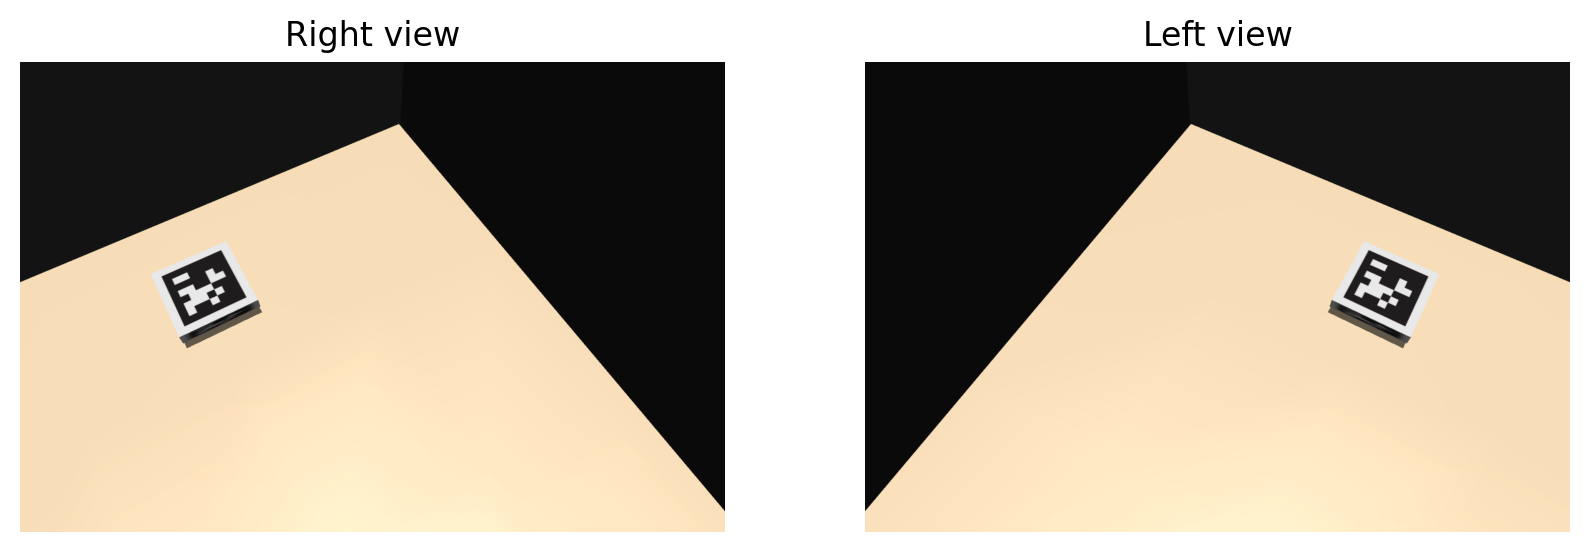

In [6]:
width = 1500
height = 1000

cam_infos_1 = env.set_cam_infos(cam_distance  = 0.0,
                    cam_azimuth   = 30.0,
                    cam_elevation = -60.0,
                    cam_lookat    = [0.9,0.0,1.5])

cam_infos_2 = env.set_cam_infos(cam_distance  = 0.0,
                    cam_azimuth   = -30.0,
                    cam_elevation = -60.0,
                    cam_lookat    = [0.9,0.0,1.5])

# Set Joint Configurations
init_configurations = [-math.pi/2, -3*math.pi/4, 3*math.pi/4, math.pi/2, math.pi/4, -math.pi/2 ]
set_env_joint_configuration(env, init_configurations, prefix='ur_')
print_env_joint_infos(env, prefix='ur_')

for _ in range(2):
    img = env.render_scene(mode='rgb_array', cam_infos=cam_infos_1, width=width, height=height, depth_toggle=False, camera_name="track")
    img_depth = env.render_scene(mode='rgb_array', cam_infos=cam_infos_1, width=width, height=height, depth_toggle=True, camera_name="track")
    img_real = env.depth_2_meters(img_depth)

    img2 = env.render_scene(mode='rgb_array', cam_infos=cam_infos_2, width=width, height=height, depth_toggle=False, camera_name="track")
    img2_depth = env.render_scene(mode='rgb_array', cam_infos=cam_infos_2, width=width, height=height, depth_toggle=True, camera_name="track")
    img2_real = env.depth_2_meters(img2_depth)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img); plt.axis('off')
plt.title("Right view")
# plt.show()

# plt.imshow(img_depth); plt.axis('off')
# plt.title("Depth view")
# plt.colorbar()
# plt.show()

# plt.imshow(img_real); plt.axis('off')
# plt.title("Real depth view")
# plt.colorbar()
# plt.show()

plt.subplot(1, 2, 2)
plt.imshow(img2); plt.axis('off')
plt.title("Left view")
plt.show()

# plt.imshow(img2_depth); plt.axis('off')
# plt.title("Depth view")
# plt.colorbar()
# plt.show()

# plt.imshow(img2_real); plt.axis('off')
# plt.title("Real depth view")
# plt.colorbar()
# plt.show()

## Extract Keypoints using `SIFT`

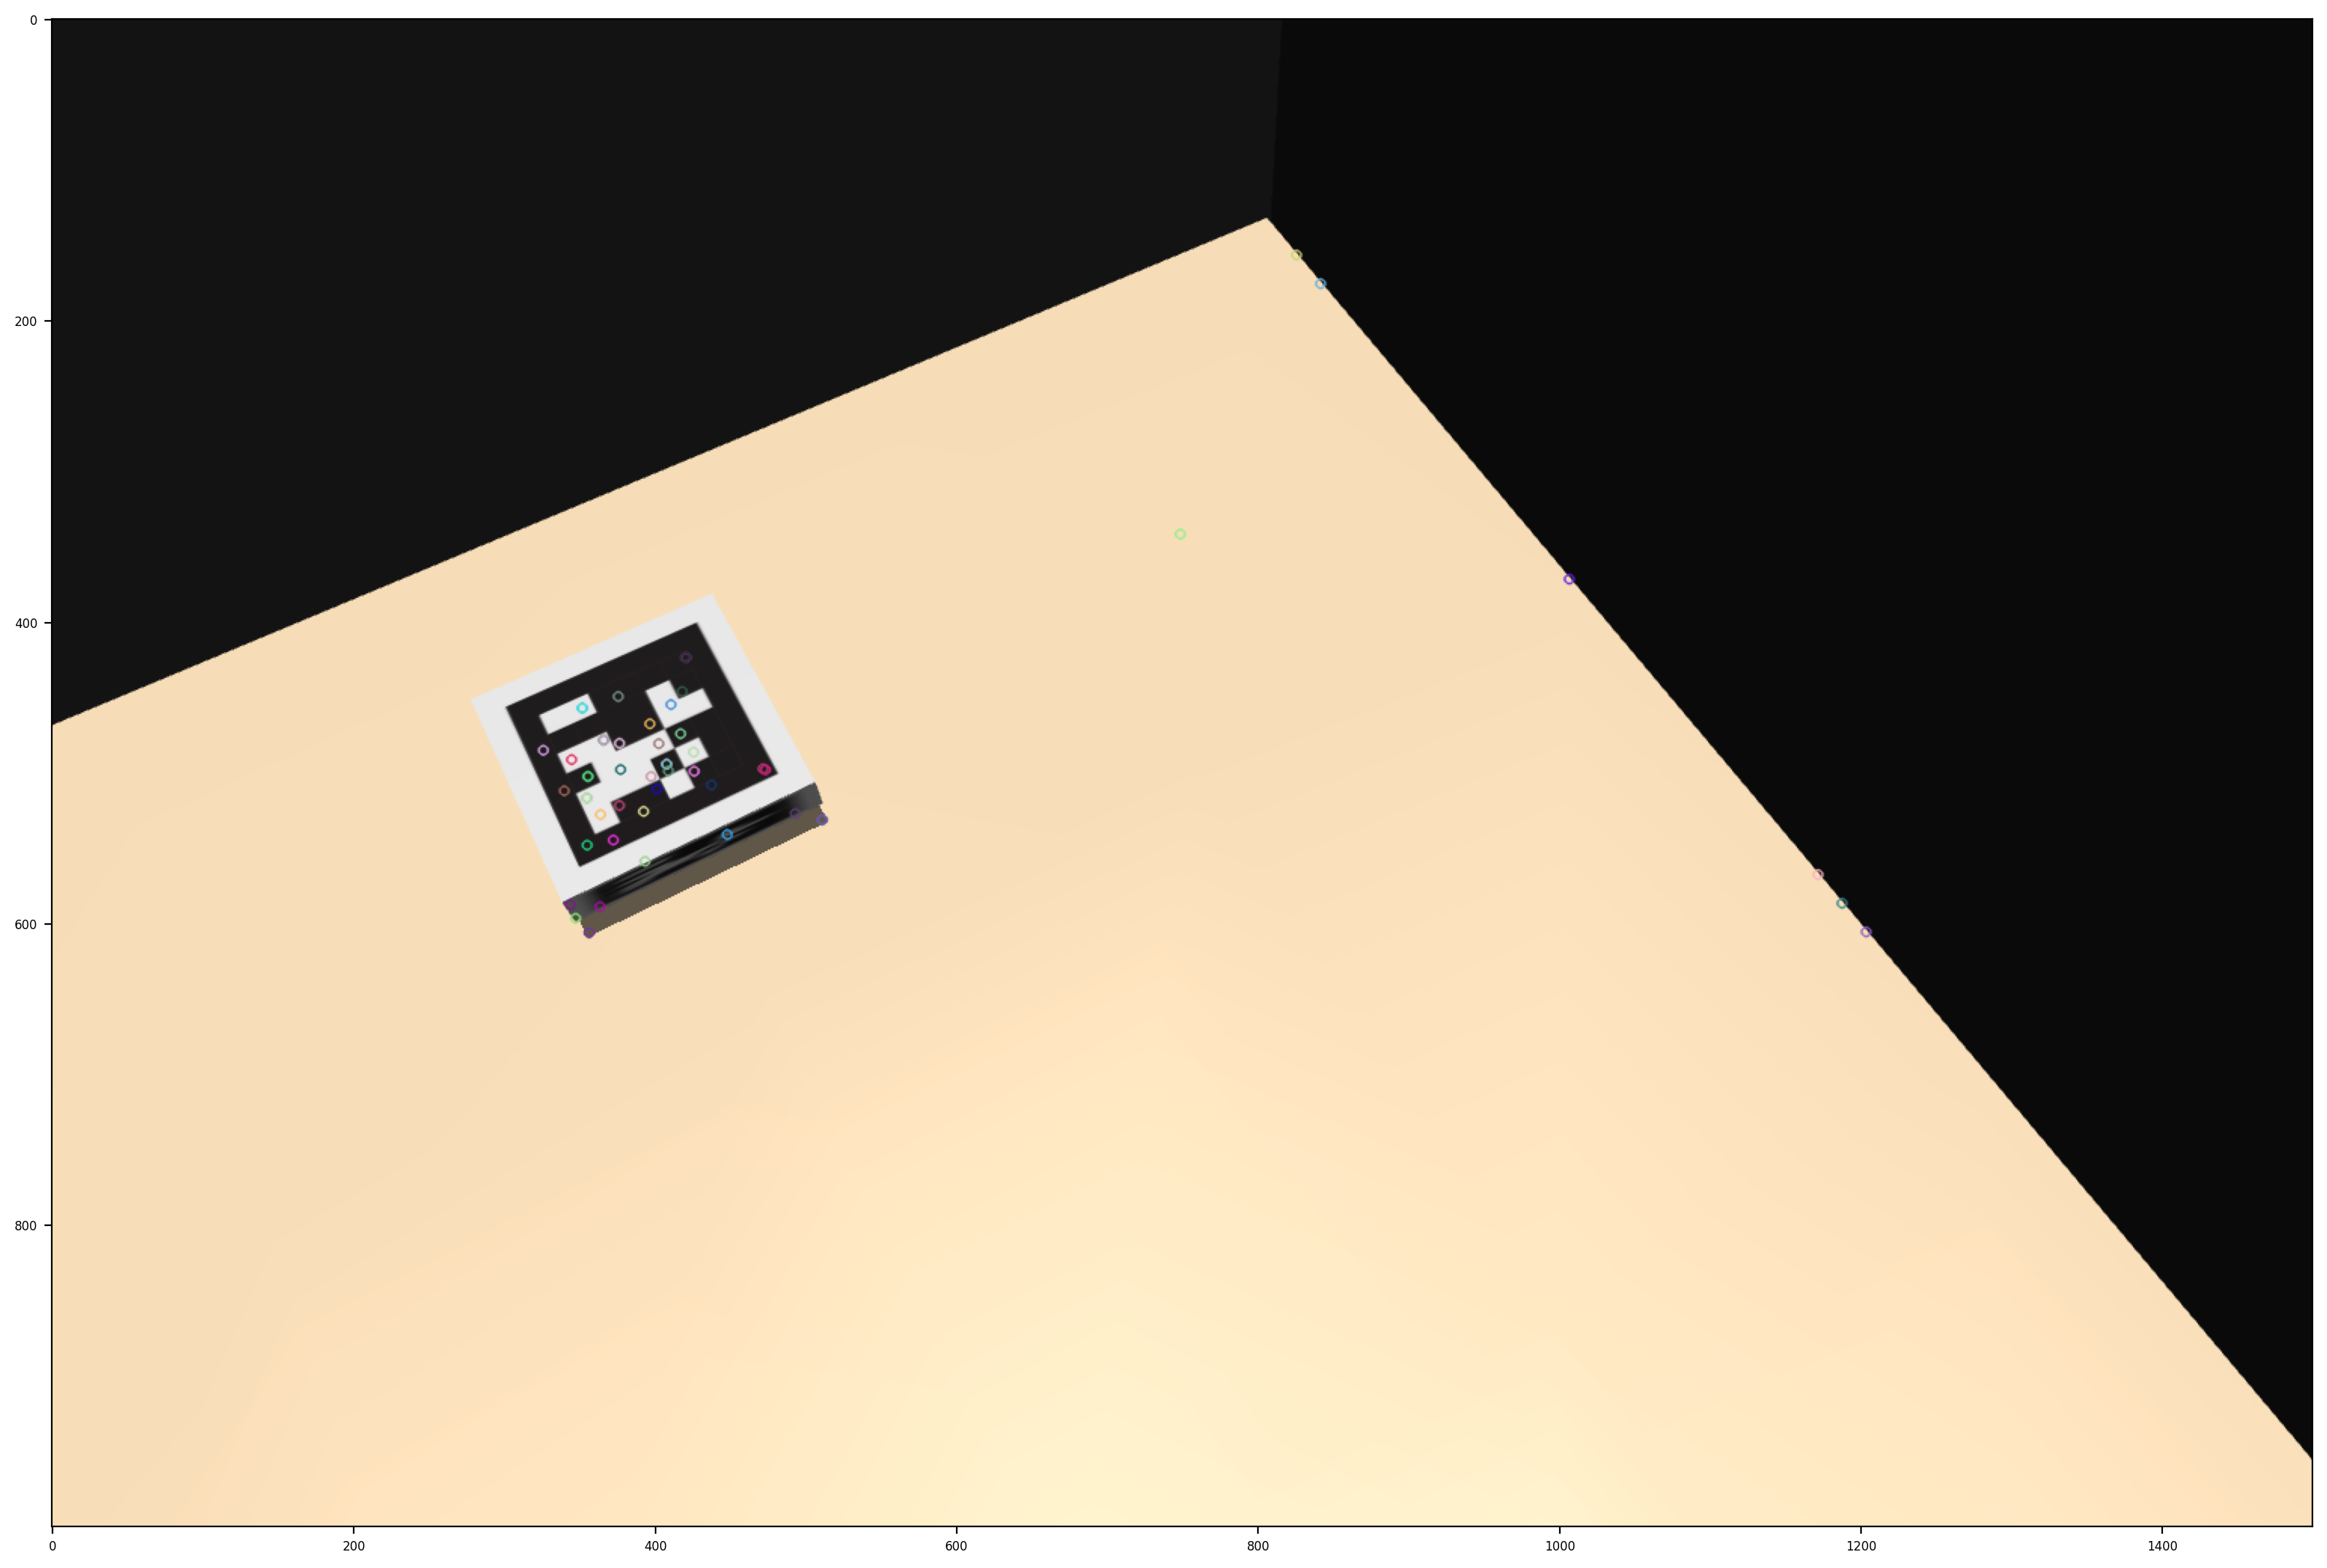

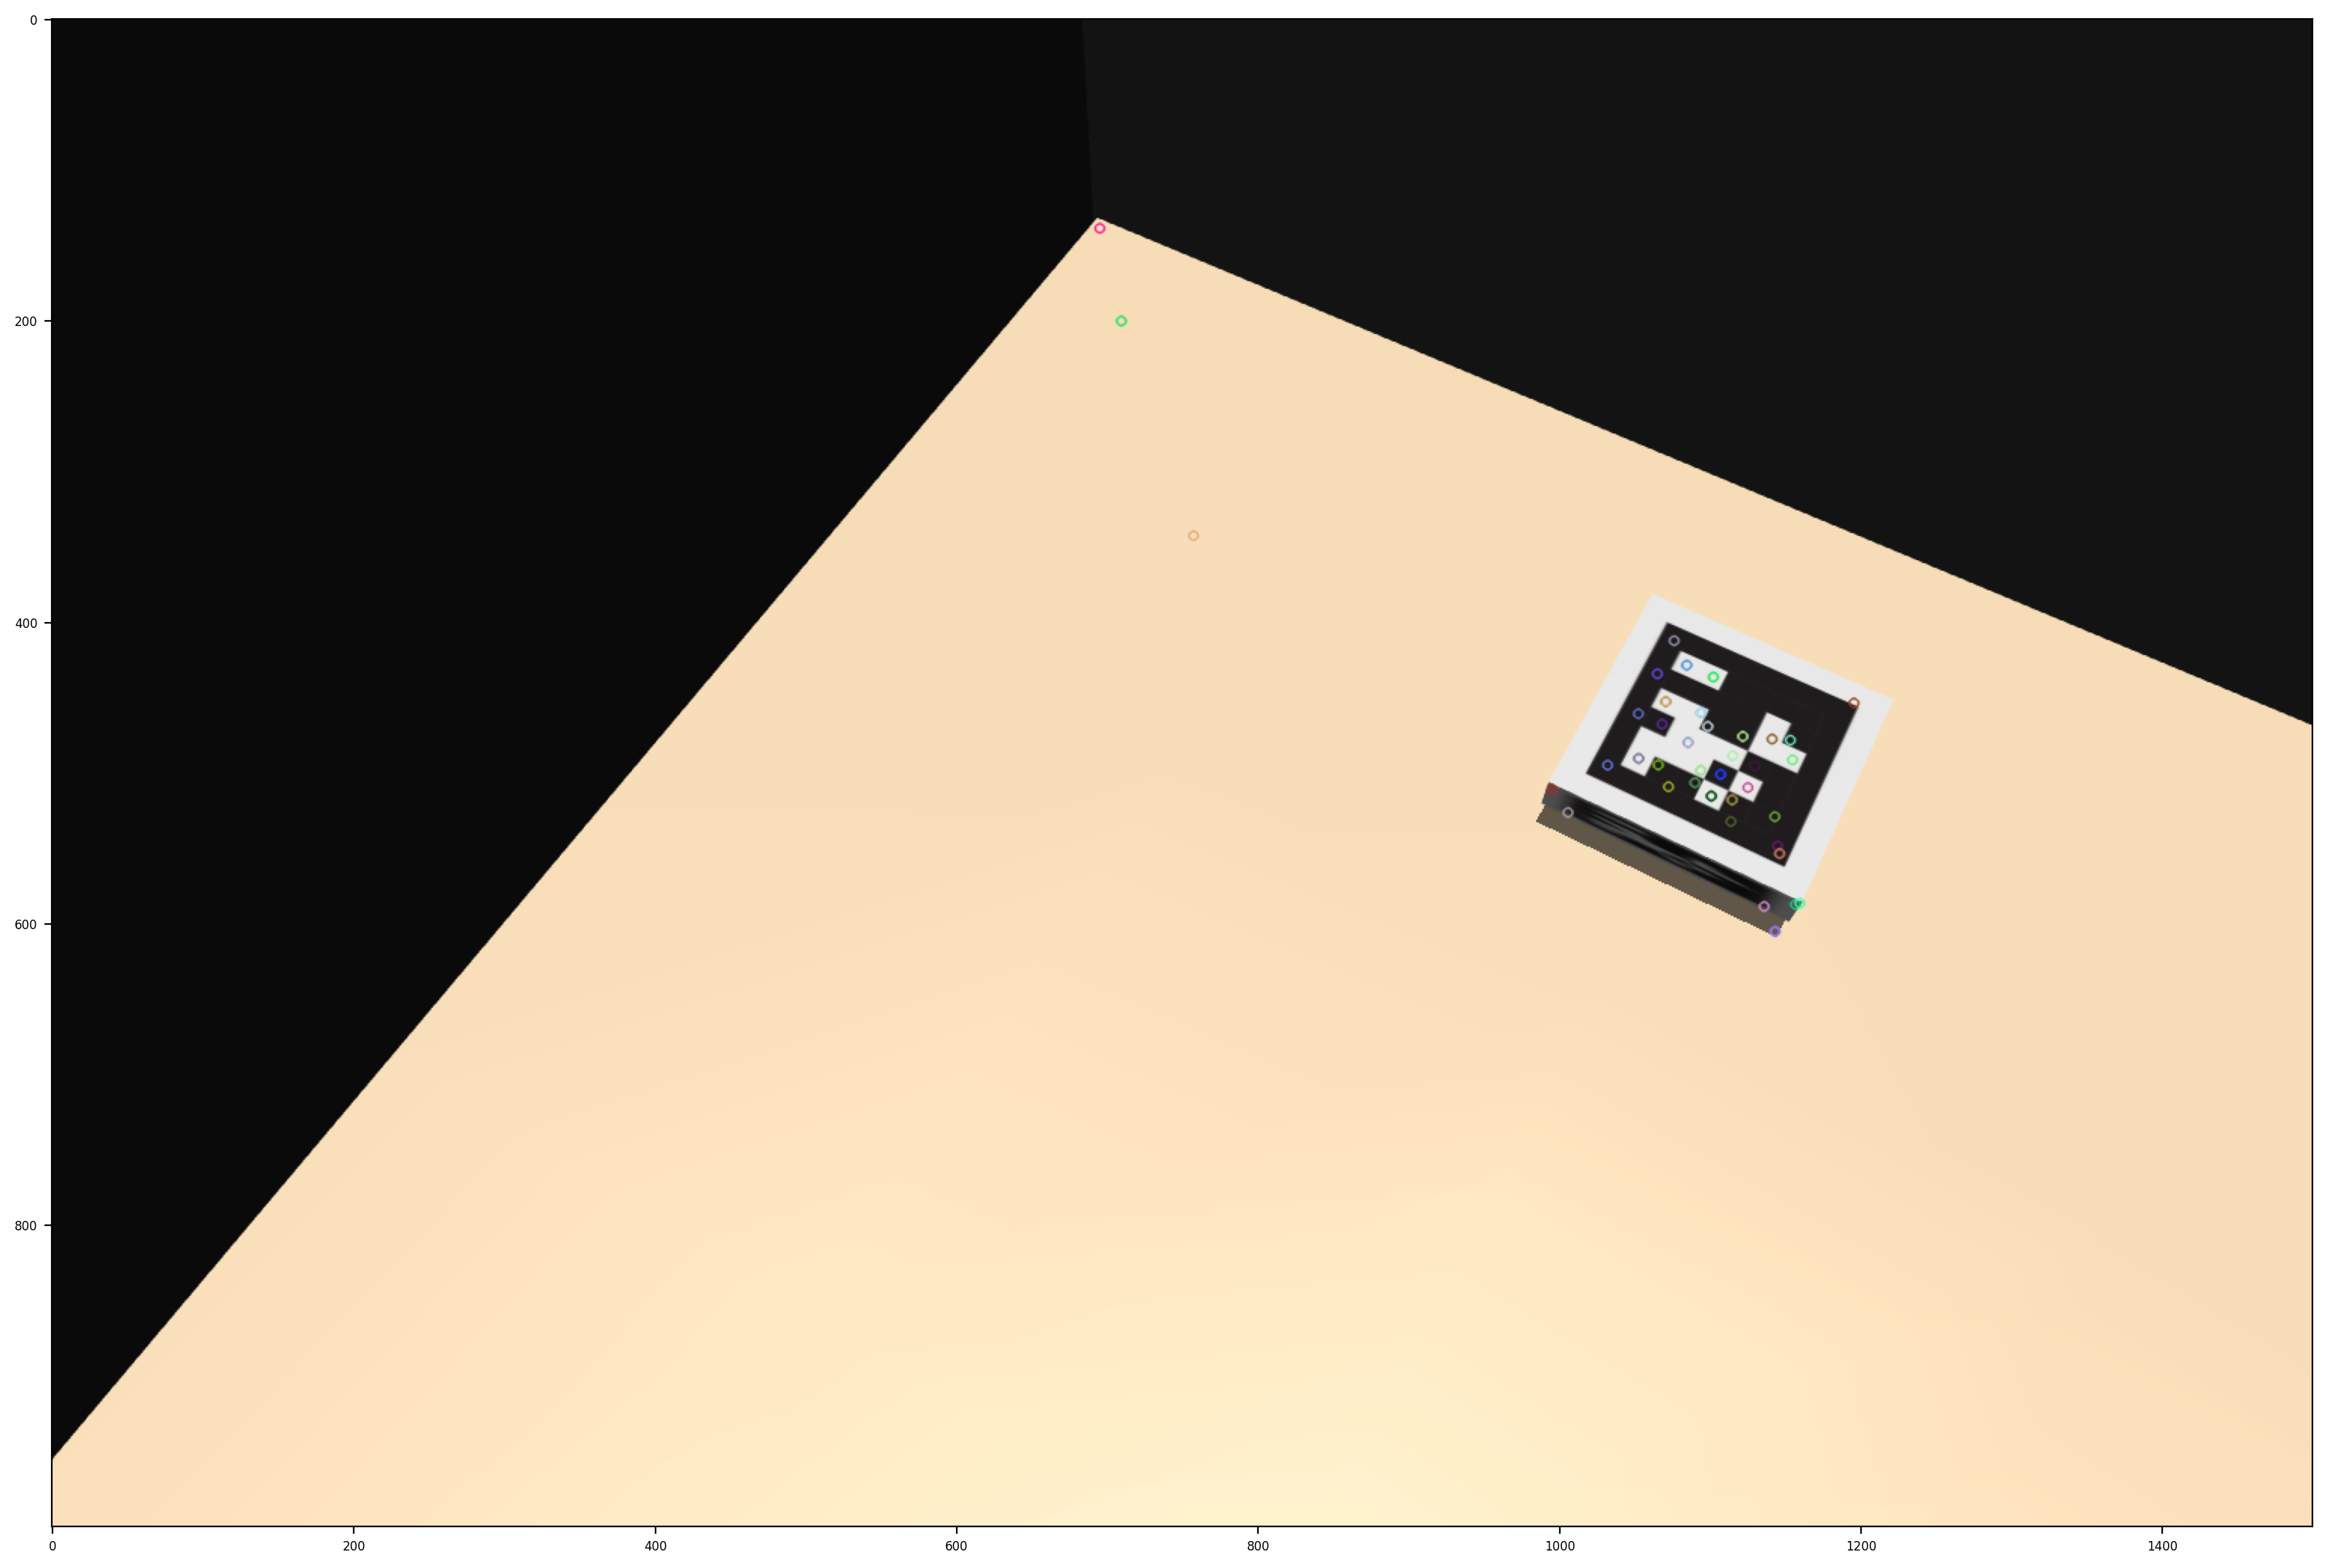

1000


In [7]:
import cv2

sift = cv2.SIFT_create()
img1_kp, img1_des = sift.detectAndCompute(img, None)
img2_kp, img2_des = sift.detectAndCompute(img2, None)

img1_draw = cv2.drawKeypoints(img, img1_kp, None)
img2_draw = cv2.drawKeypoints(img2, img2_kp, None)
plt.figure(figsize=(20, 20))
plt.imshow(img1_draw)
plt.show()
plt.figure(figsize=(20, 20))
plt.imshow(img2_draw)
plt.show()
print(len(img1_draw))

## Match Features using `BFMatcher`

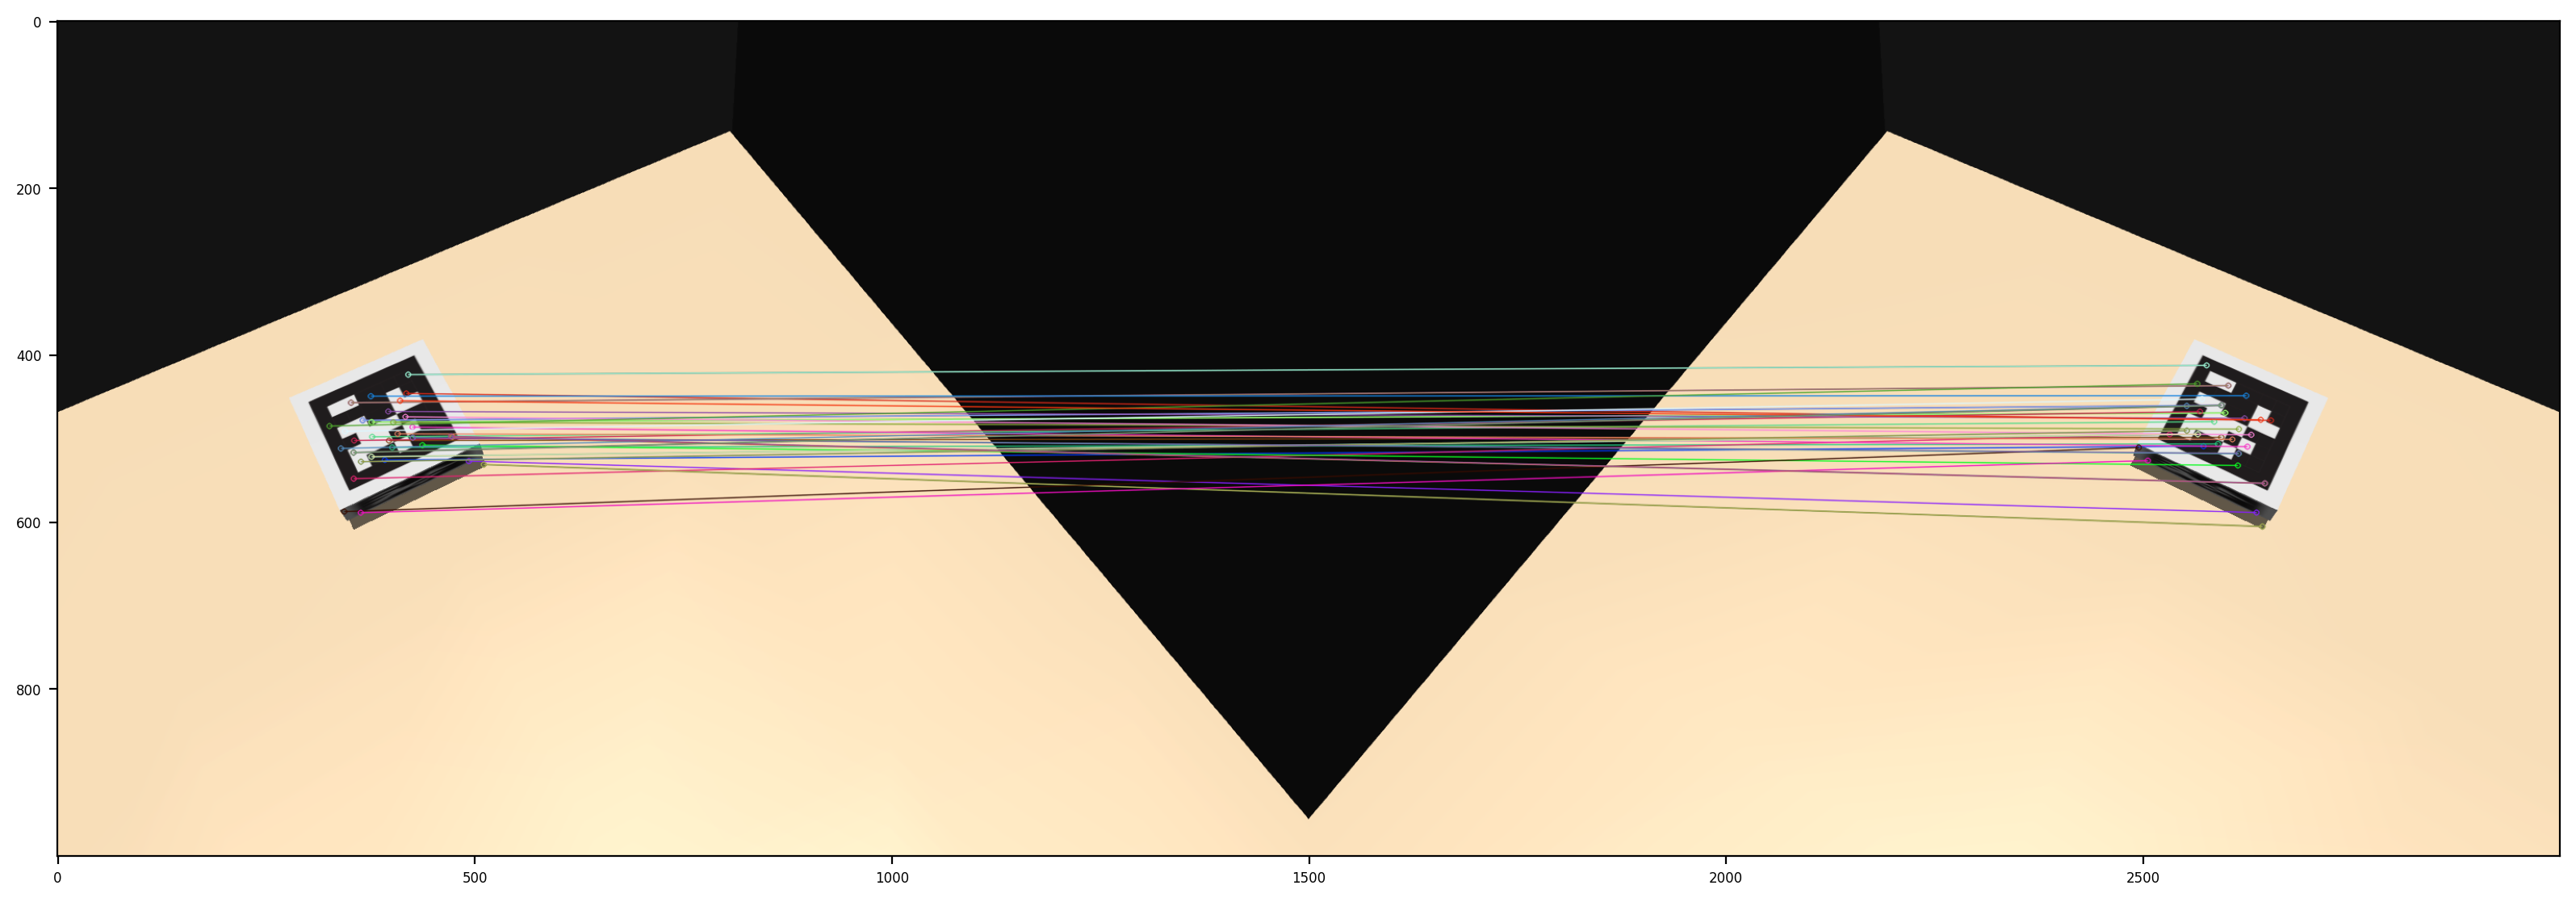

The number of Sorted matching points: 42


In [8]:
# BFM(Brute force matching) with k=2
bf = cv2.BFMatcher()
matches = bf.knnMatch(img1_des, img2_des, k=2)
# bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
# matches = bf.match(img1_des, img2_des)

# Ratio test and retrieval of indices
matches_good = [m1 for m1, m2 in matches if m1.distance < 0.80*m2.distance]

sorted_matches = sorted(matches_good, key=lambda x: x.distance)
res = cv2.drawMatches(img, img1_kp, img2, img2_kp, sorted_matches, img2, flags=2) 

plt.figure(figsize=(20, 20))
plt.imshow(res)
plt.show()
print("The number of Sorted matching points:", len(sorted_matches))

## Estimate `Essential` matrix using `RANSAC`

In [9]:
# queryIdx : 1번 이미지의 feature point index
# trainIdx : 2번 이미지의 feature point index
query_idx = [match.queryIdx for match in matches_good]
train_idx = [match.trainIdx for match in matches_good]

# Getting float based points from good matches
p1 = np.float32([img1_kp[ind].pt for ind in query_idx])
p2 = np.float32([img2_kp[ind].pt for ind in train_idx])

print(p1.shape)
print(p1[:3])

# 픽셀 좌표
img1_pts = np.array([img1_kp[m.queryIdx].pt for m in matches_good]).reshape(-1, 1, 2).astype(np.float32) 
img2_pts = np.array([img2_kp[m.trainIdx].pt for m in matches_good]).reshape(-1, 1, 2).astype(np.float32)

print(img1_pts.shape)
print(img1_pts[:3])

(42, 2)
[[325.68 484.6 ]
 [339.55 511.5 ]
 [343.48 587.07]]
(42, 1, 2)
[[[325.68 484.6 ]]

 [[339.55 511.5 ]]

 [[343.48 587.07]]]


In [10]:
K, _, _ = env.camera_matrix_and_pose(width=env.render_width, height=env.render_height, camera_name="main1")
K[0][0] # focal length of x

1207.1067811865476

In [11]:
E, mask = cv2.findEssentialMat(p1, p2, method=cv2.RANSAC, focal=1207.1, pp=(0., 0.), maxIters = 500, threshold=1)
print(E)

[[-0.15 -0.23 -0.06]
 [ 0.41 -0.32 -0.48]
 [ 0.46  0.47  0.04]]


### `SVD(Singular value decomposition)` about Essential matrix

In [12]:
# The four possible solutions for calibrated reconstruction from E

# Essential matrix to camera matrix
U, S, VT = np.linalg.svd(E, full_matrices=True)
W = np.array([
    [0, -1, 0],
    [1, 0, 0],
    [0, 0, 1]
])

# camera matrix = P'= [UWVT | +u3] or [UWVT | −u3] or [UWTVT | +u3] or [UWTVT | −u3].
camera_matrix = np.array([
    np.column_stack((U @ W @ VT, U[:,2])),
    np.column_stack((U @ W @ VT, -U[:,2])),
    np.column_stack((U @ W.T @ VT, U[:,2])),
    np.column_stack((U @ W.T @ VT, -U[:,2]))])

print("The four possible solutions for calibrated reconstruction from E \n\n",camera_matrix)

The four possible solutions for calibrated reconstruction from E 

 [[[ 0.7  -0.58  0.42  0.92]
  [ 0.63  0.78  0.02 -0.09]
  [-0.34  0.25  0.91  0.38]]

 [[ 0.7  -0.58  0.42 -0.92]
  [ 0.63  0.78  0.02  0.09]
  [-0.34  0.25  0.91 -0.38]]

 [[ 0.14 -0.36  0.92  0.92]
  [-0.71 -0.68 -0.16 -0.09]
  [ 0.69 -0.64 -0.35  0.38]]

 [[ 0.14 -0.36  0.92 -0.92]
  [-0.71 -0.68 -0.16  0.09]
  [ 0.69 -0.64 -0.35 -0.38]]]


In [13]:
for i in range(4): # camera pose matrix , Rt x , 3d point HOMOGENIEUOUS 
    tmp = camera_matrix[i]
    for j in range(len(p1)):
        a = p1[j].flatten()
        b = p2[j].flatten()
        c = np.concatenate((a, b))
        d = tmp@c.T # 3x4@4x4
        if np.any(d<0):
            print("made by camera matrix", i, "is not reconstructed point in front of both cameras")
            break

made by camera matrix 1 is not reconstructed point in front of both cameras
made by camera matrix 2 is not reconstructed point in front of both cameras
made by camera matrix 3 is not reconstructed point in front of both cameras


# Essential matrix decompose to `Transformation` matrix

In [14]:
# The four possible solutions for calibrated reconstruction from E
def EM_Decomposition(E):
    CM = np.array([[]])
    
    # Essential matrix to camera matrix
    U, S, VT = np.linalg.svd(E, full_matrices=True)
    W = np.array([
        [0, -1, 0],
        [1, 0, 0],
        [0, 0, 1]
    ])

    # camera matrix = P'= [UWVT | +u3] or [UWVT | −u3] or [UWTVT | +u3] or [UWTVT | −u3].
    camera_matrix = np.array([
        np.column_stack((U @ W @ VT, U[:,2])),
        np.column_stack((U @ W @ VT, -U[:,2])),
        np.column_stack((U @ W.T @ VT, U[:,2])),
        np.column_stack((U @ W.T @ VT, -U[:,2]))])

    # camera pose matrix , Rt x , 3d point HOMOGENIEUOUS 
    for i in range(4): 
        tmp = camera_matrix[i]
        for j in range(len(p1)):
            a = p1[j].flatten()
            b = p2[j].flatten()
            c = np.concatenate((a, b))
            d = tmp@c.T # 3x4@4x4
            if np.any(d<0):
                break
            else:
                CM = camera_matrix[i]
    return CM

E_CM = EM_Decomposition(E)
E_CM

array([[ 0.7 , -0.58,  0.42,  0.92],
       [ 0.63,  0.78,  0.02, -0.09],
       [-0.34,  0.25,  0.91,  0.38]])

### Or using `cv2.recoverPose` function

In [15]:
points, R, t, mask_pose = cv2.recoverPose(E, p1, p2)
R

array([[ 0.7 , -0.58,  0.42],
       [ 0.63,  0.78,  0.02],
       [-0.34,  0.25,  0.91]])

In [16]:
t

array([[ 0.92],
       [-0.09],
       [ 0.38]])

In [17]:
# Generate 3D point by implementing Triangulation
# R = E_CM[:3, :3]
# t = E_CM[:, 3]

Rt0 = np.hstack((np.eye(3), np.zeros((3, 1))))
Rt1 = np.hstack((R, t))
Rt1 = np.matmul(K, Rt1)

pt1 = np.transpose(p1)
pt2 = np.transpose(p2)

p3d = cv2.triangulatePoints(Rt0, Rt1, pt1, pt2)
p3d /= p3d[3] # Homogeneous Coordinate

In [18]:
p3d.shape

(4, 42)

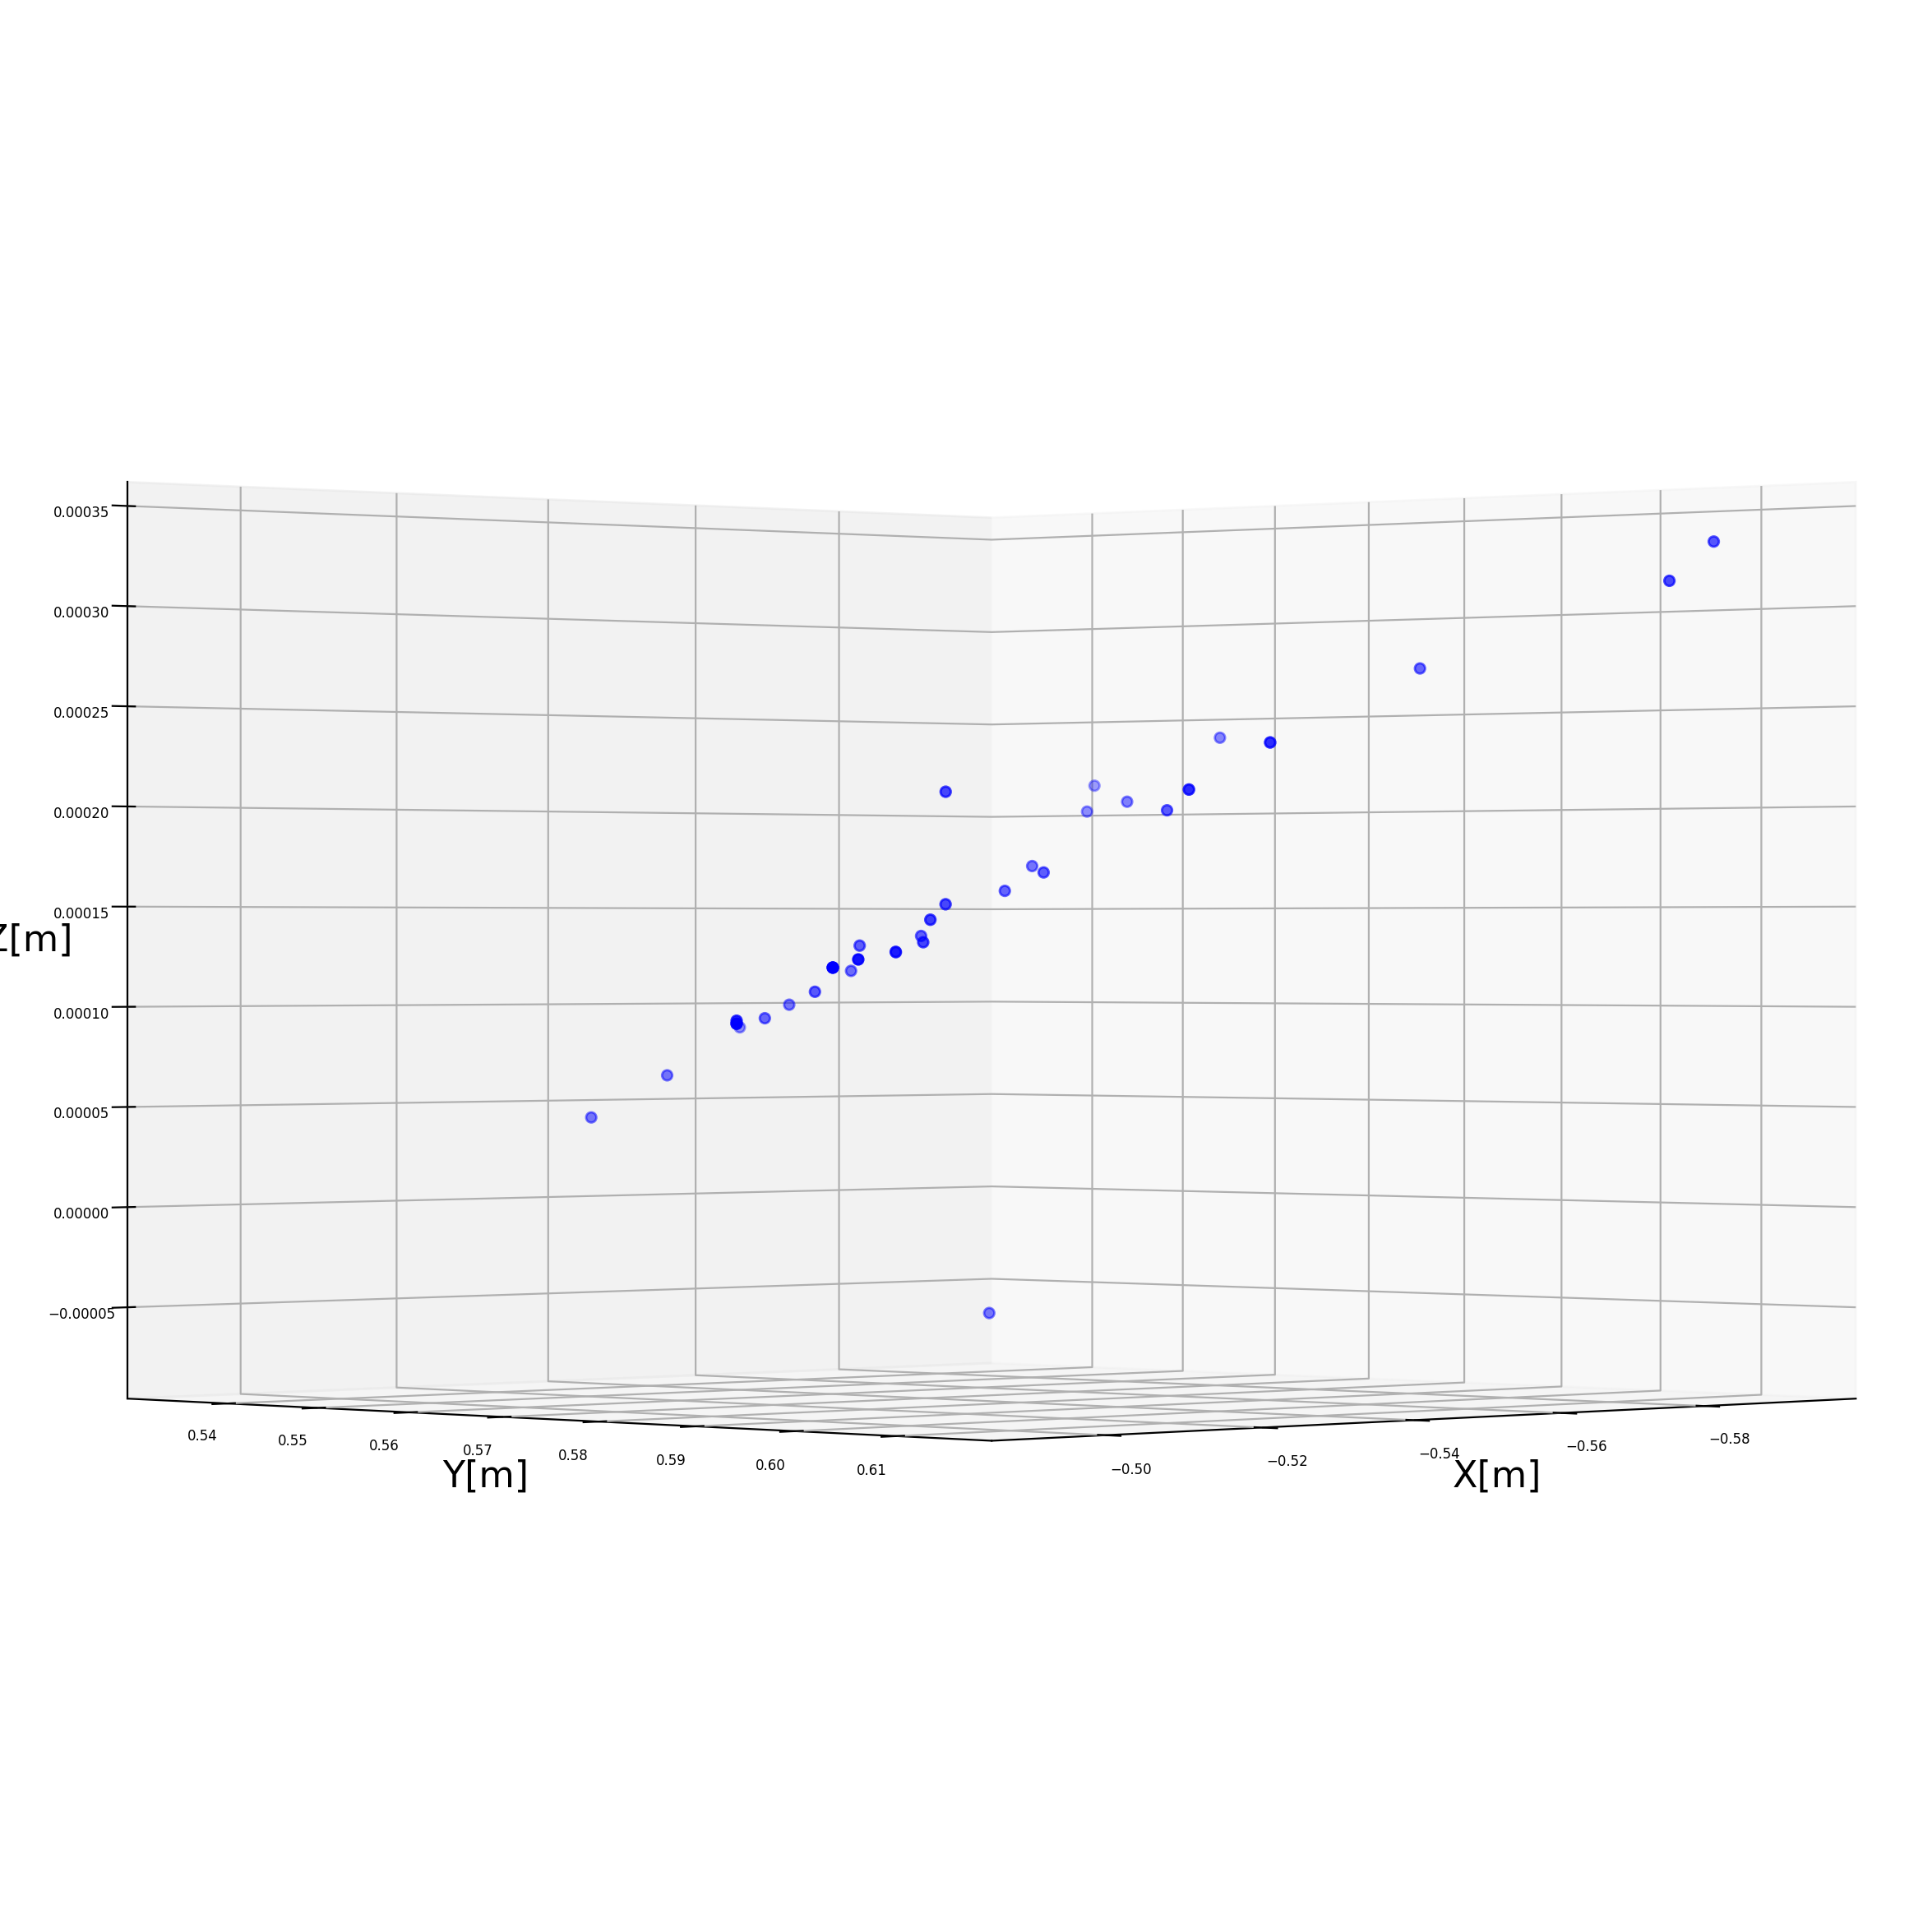

In [23]:
X = np.array([])
Y = np.array([])
Z = np.array([]) #120 

X = np.concatenate((X, p3d[0]))
Y = np.concatenate((Y, p3d[1]))
Z = np.concatenate((Z, p3d[2]))

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z, c='b', marker='o') 
ax.set_xlabel("X[m]", fontsize=16)
ax.set_ylabel("Y[m]",fontsize=16)
ax.set_zlabel("Z[m]", fontsize=16)
ax.view_init(0, 45, 0)
plt.show()